In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\asus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_excel("Day-ahead_prices_201901010000_202409290000_Hour.xlsx")
df = df.drop(index=range(0, 8))

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
df = df.reset_index(drop=True)
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header 

In [6]:
df.replace('-', np.nan, inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_1228\32311047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


In [7]:
df

,Start date,End date,Germany/Luxembourg [€/MWh],∅ DE/LU neighbours [€/MWh],Belgium [€/MWh],Denmark 1 [€/MWh],Denmark 2 [€/MWh],France [€/MWh],Netherlands [€/MWh],Norway 2 [€/MWh],Austria [€/MWh],Poland [€/MWh],Sweden 4 [€/MWh],Switzerland [€/MWh],Czech Republic [€/MWh],DE/AT/LU [€/MWh],Northern Italy [€/MWh],Slovenia [€/MWh],Hungary [€/MWh]
1,"Jan 1, 2019 12:00 AM","Jan 1, 2019 1:00 AM",28.32,NaN,69.49,28.32,28.32,51.00,68.92,48.77,33.48,NaN,28.32,50.26,8.50,NaN,51.00,51.00,59.90
2,"Jan 1, 2019 1:00 AM","Jan 1, 2019 2:00 AM",10.07,NaN,66.58,10.07,10.07,46.27,64.98,49.25,39.76,NaN,10.07,48.74,3.97,NaN,46.27,46.27,52.71
3,"Jan 1, 2019 2:00 AM","Jan 1, 2019 3:00 AM",-4.08,NaN,65.07,-4.08,-4.08,39.78,60.27,49.17,39.78,NaN,10.03,47.24,4.70,NaN,39.78,39.78,36.49
4,"Jan 1, 2019 3:00 AM","Jan 1, 2019 4:00 AM",-9.91,NaN,52.17,-9.91,-9.91,27.87,49.97,48.37,27.87,NaN,4.56,36.29,0.93,NaN,27.87,27.87,31.24
5,"Jan 1, 2019 4:00 AM","Jan 1, 2019 5:00 AM",-7.41,NaN,47.66,-7.41,-7.41,23.21,47.66,47.19,-0.36,NaN,4.83,30.09,3.90,NaN,22.00,-0.36,25.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50347,"Sep 28, 2024 7:00 PM","Sep 28, 2024 8:00 PM",100.08,82.69,115.25,46.84,46.84,111.23,144.77,34.78,84.95,116.53,8.07,99.98,100.37,NaN,139.15,139.15,134.62
50348,"Sep 28, 2024 8:00 PM","Sep 28, 2024 9:00 PM",96.31,78.26,109.86,36.03,36.03,105.73,141.98,34.99,91.95,99.86,5.36,101.62,97.44,NaN,134.67,111.80,106.57
50349,"Sep 28, 2024 9:00 PM","Sep 28, 2024 10:00 PM",80.70,64.93,88.52,35.55,10.17,86.09,105.50,34.52,78.95,100.89,4.23,88.05,81.81,NaN,110.00,88.05,83.38
50350,"Sep 28, 2024 10:00 PM","Sep 28, 2024 11:00 PM",80.28,63.94,84.51,35.28,26.43,83.22,94.50,34.94,78.92,95.38,3.69,85.52,80.93,NaN,105.00,84.96,81.93


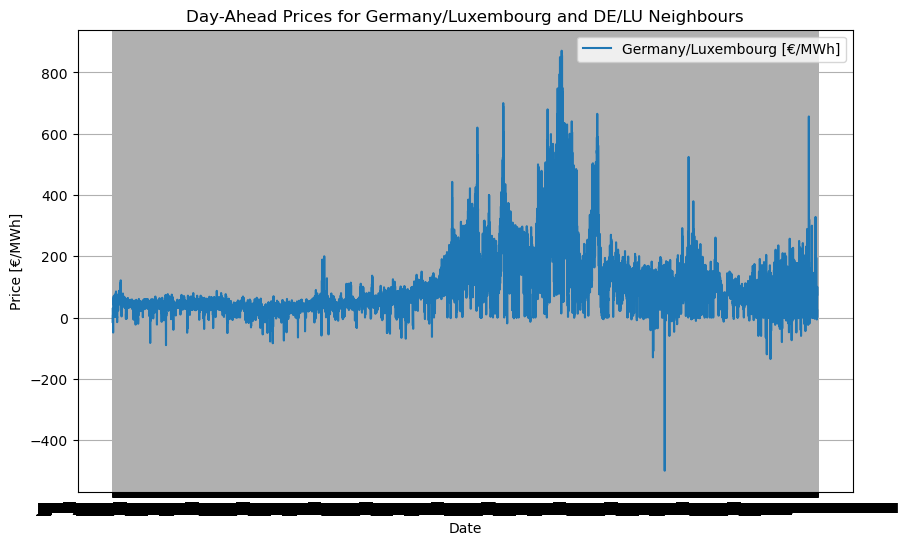

In [11]:
df_filtered = df[['Start date', 'End date', 'Germany/Luxembourg [€/MWh]', '∅ DE/LU neighbours [€/MWh]']]
df_filtered
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Start date'], df_filtered['Germany/Luxembourg [€/MWh]'], label='Germany/Luxembourg [€/MWh]')

plt.title('Day-Ahead Prices for Germany/Luxembourg and DE/LU Neighbours')
plt.xlabel('Date')
plt.ylabel('Price [€/MWh]')
plt.legend(loc='best')
plt.grid(True)
plt.show()

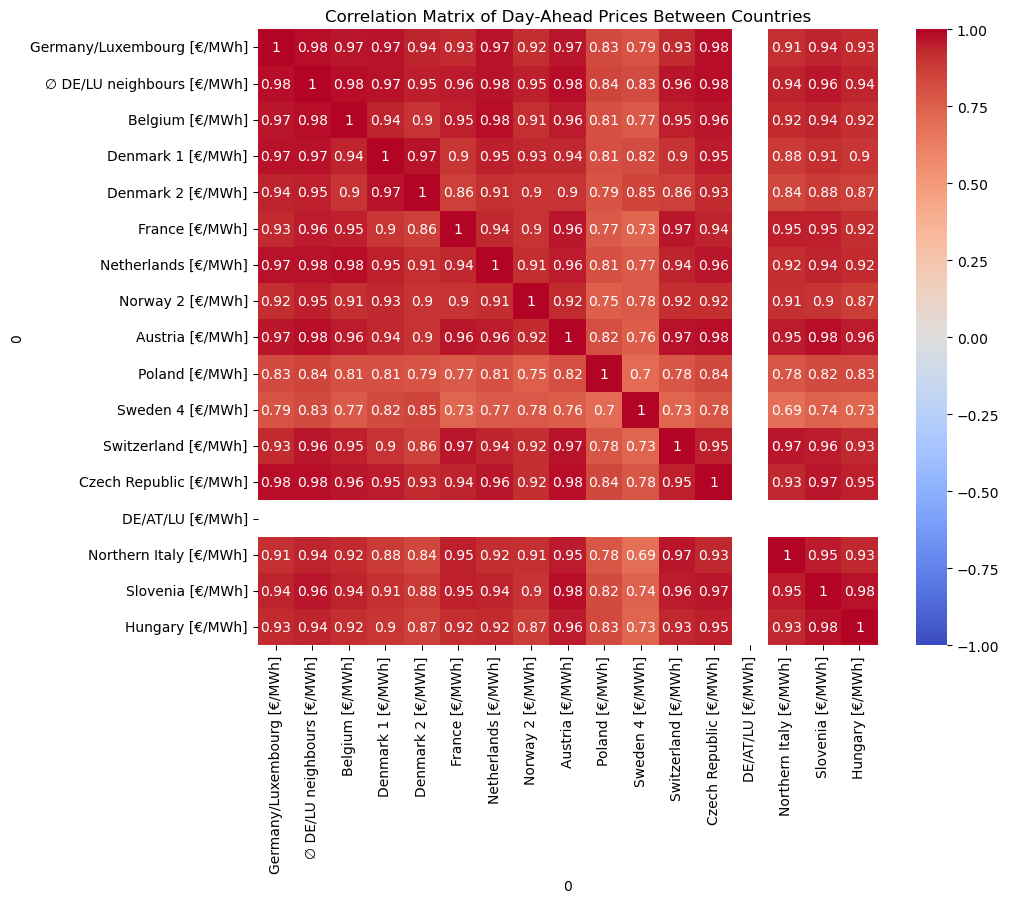

In [9]:
corr_matrix = df[cols_to_convert].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Day-Ahead Prices Between Countries')
plt.show()